# Demo notebook for generating a synthetic 3D image with lines and corrupting it with noise and Gaussian blur

In [1]:
import numpy as np
from skimage import io
import json

from cs_sim.synth.filaments import generate_img_with_filaments
from cs_sim.corrupt import corrupt_image

## Specify parameters for a synthetic image

In [2]:
params_synth_data = dict(
    imgshape=(20, 100, 100),
    n_filaments=10,
    maxval=255,
    n_points=100
)

## Generate a synthetic image with filaments

### 2D image with sine-shaped cuves

/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


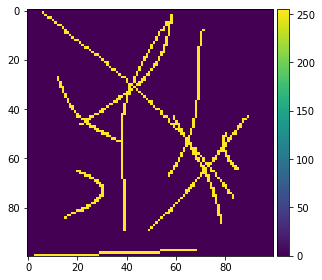

In [3]:
img = generate_img_with_filaments(imgshape=(100, 100), n_filaments=10, maxval=255, n_points=100)
io.imshow(img)

### 2D image with straight lines that are uniquely labeled 

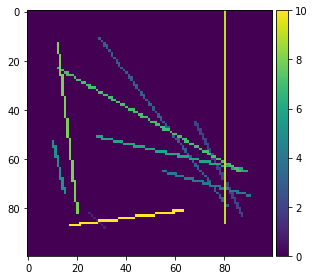

In [4]:
img = generate_img_with_filaments(imgshape=(100, 100), curve_type='line', n_filaments=10, maxval=255, n_points=100, instance=True)
io.imshow(img)

### 3D image 

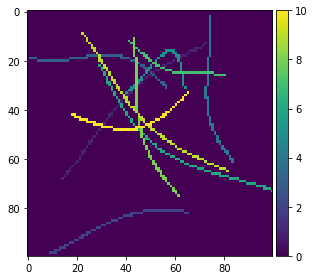

In [5]:
img = generate_img_with_filaments(imgshape=(20, 100, 100), curve_type='sine_curve', n_filaments=10, maxval=255, n_points=100, instance=True)
io.imshow(img.max(0))

### Details of the input parameters:

In [6]:
generate_img_with_filaments?

Signature:
generate_img_with_filaments(
    imgshape,
    curve_type='sine_curve',
    n_filaments=10,
    maxval=255,
    n_points=None,
    instance=False,
    thick=False,
    **curve_kwargs,
)
Docstring:
Generate an image with straight lines.
The start and the end of each line are chosen randomly.
The line coordinates in between are interpolated with the given number of point (`n_points`)

Parameters
----------
imgshape : tuple
    Image shape.
    The number of inputs should correspond to the number of dimensions.
curve_type : str
    Type of the curve ('line' or 'curve').
    Default is 'line'.
n_filaments : int, optional
    Number of filaments to generate.
    Default is 10.
maxval : scalar, optional
    The value to be assigned to the lines/foreground (the background value is 0).
    Default is 255.
n_points : int, optional
    Number of points to represent each line.
    Should be on the order of image size.
    Increase if lines get disconnected.
    If None, the number of p


------------

## Specify parameters for image corruption with noise and blurring

There are 4 steps that can be combined in any order:

1. Perlin noise: adds low-frequency background. The `size` parameter specifies the size of the low-frequency pattern (in pixels), the `value` parameter specifies the amplitude.
2. Convolve: convolves the image with either a specified PSF image (`psf` parameter), or with a gaussian kernel of specified `sigma`. 
3. Poisson noise, with specified `snr`.
4. Gaussian noise, with specified `snr`.

In [7]:
corruption_steps = [
    ('perlin_noise', {'size': 50, 'value': 0.1}),
    ('poisson_noise', {'snr': 2}),
    ('convolve', {'sigma': 2}),
    ('gaussian_noise', {'snr': 100})
]

## Corrupt the image with the specified corruption steps

In [8]:
imgf = corrupt_image(img, corruption_steps)

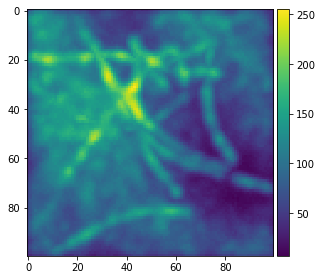

In [9]:
io.imshow(imgf.max(0))

## Save parameters to a json file for batch processing

In [10]:
params_synth_data = dict(
    imgshape=(20, 100, 100),
    n_filaments=10,
    maxval=255,
    n_points=100
)

In [11]:
param_fn_synth = 'parameters_synthetic.json'

In [12]:
with open(param_fn_synth, 'w') as f:
    json.dump(params_synth_data, f, indent=4)

In [13]:
param_fn_corruption = 'corruption_steps.json'

In [14]:
with open(param_fn_corruption, 'w') as f:
    json.dump(corruption_steps, f, indent=4)